<a href="https://colab.research.google.com/github/startbkgogo/first/blob/main/ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

● Numpy - 고성능 과학 계산과 다차원 배열을 위한 패키지

● pandas -  파이썬 데이터 분석을 위한 전문 패키지

● matplotlib - 파이썬 데이터 시각화 기본 패키지

● ScyPy - NumPy를

●


In [7]:
# z 점수 구하기 : 평균에서 얼마나 떨어져 있는지를 표준편차 기준으로 나타낸 값
import numpy as np

# 샘플 데이터
x = [0, 3, 5, 7, 10]

# 표준 편차
s = np.std(x)
print(f"표준편차 : {s}")
# 평균
m = np.mean(x)
print(f"평균 : {m}")
# 7이라는 데이터의 z 점수(=표준점수)
z = (7 - m) / s
print(z)

표준편차 : 3.40587727318528
평균 : 5.0
0.5872202195147035


In [2]:
# scipy 이용한 각각의 데이터 표준점수( = z 점수 ) 구하기
from scipy import stats

stats.zscore(x)

# 0 : -1.46805055,
# 3 : -0.58722022,
# 5 : 0.        ,
# 7 : 0.58722022,
# 10 : 1.46805055

array([-1.46805055, -0.58722022,  0.        ,  0.58722022,  1.46805055])

In [3]:
# 누적 분포
# 평균(가운데 위치)까지의 분포의 합
stats.norm.cdf(0)

np.float64(0.5)

In [12]:
# 평균에서 표준 편차 만큼 (-1 ~ 1) 누적분포 구하기 - 68% 확률로 데이터가 존재한다.
stats.norm.cdf(1.0) - stats.norm.cdf(-1.0)

np.float64(0.6826894921370859)

In [8]:
# 평균에서 표준 편차 만큼 (-2 ~ 2) 누적분포 구하기 - 95% 확률로 데이터가 존재한다.
stats.norm.cdf(2.0) - stats.norm.cdf(-2.0)

np.float64(0.9544997361036416)

In [9]:
# 90%의 누적분포에 해당하는 z 점수
stats.norm.ppf(0.9)

np.float64(1.2815515655446004)

In [26]:
import gdown
gdown.download("https://bit.ly/3pK7iuu", "ns_book7.csv", quiet=False)

import pandas as pd
ns_book7 = pd.read_csv("ns_book7.csv", low_memory=False)
ns_book7.head()

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 190MB/s]


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


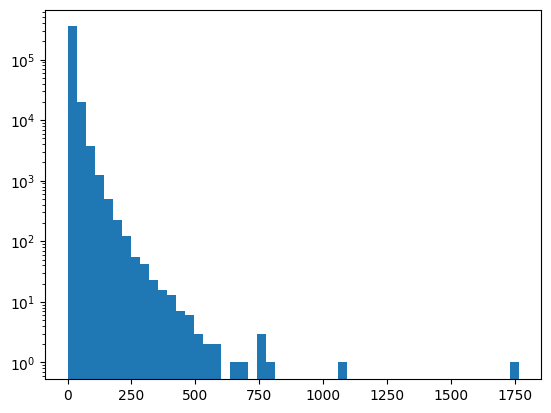

In [13]:
import matplotlib.pyplot as plt

# hist() 그래프의 타입 히스토리그램
plt.hist(ns_book7["대출건수"], bins=50)
# 로그처리(log) : 작 -> 크게, 큰 -> 작게 (작은 데이터가 잘 보이게)
plt.yscale("log")
plt.show()

In [27]:
# 샘플링하기 (= 표본 만들기)
np.random.seed(42)
sample_means = []
# 1000번 반복 - 변수는 별도로 필요하지 않다. 그때 _ 사용
for _ in range(1000):
  # 대출건수의 대해서 30개를 랜덤하게 선택하고 평균을 낸다.
  m = ns_book7["대출건수"].sample(30).mean()
  sample_means.append(m)

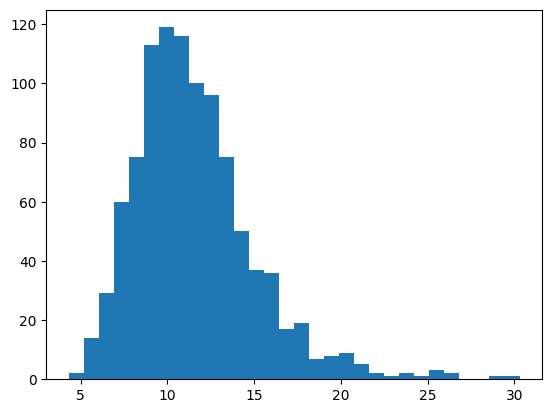

In [29]:
# 거의 정규분포 그래프가 된다.
plt.hist(sample_means, bins=30)
plt.show()

In [30]:
# 모집단의 평균과 표본(30개)의 평균을 비교해보자.
# 표본의 평균
np.mean(sample_means)

np.float64(11.539900000000001)

In [31]:
ns_book7["대출건수"].mean()

np.float64(11.593438968070707)

In [32]:
# 샘플링하기 (= 표본 만들기) - 개수 줄이기
np.random.seed(42)
sample_means = []
# 1000번 반복 - 변수는 별도로 필요하지 않다. 그때 _ 사용
for _ in range(1000):
  # 대출건수의 대해서 20개를 랜덤하게 선택하고 평균을 낸다.
  m = ns_book7["대출건수"].sample(20).mean()
  sample_means.append(m)
np.mean(sample_means)

np.float64(11.39945)

In [33]:
# 샘플링하기 (= 표본 만들기) - 개수 늘리기
np.random.seed(42)
sample_means = []
# 1000번 반복 - 변수는 별도로 필요하지 않다. 그때 _ 사용
for _ in range(1000):
   # 대출건수의 대해서 40개를 랜덤하게 선택하고 평균을 낸다.
  m = ns_book7["대출건수"].sample(40).mean()
  sample_means.append(m)
np.mean(sample_means)

np.float64(11.5613)

In [34]:
# 표본으로 표준편차를 구했을때
np.std(sample_means)

np.float64(3.0355987564235165)

In [35]:
# 모집단으로 표준편차를 구했을때
np.std(ns_book7["대출건수"]) / np.sqrt(40)

np.float64(3.048338251813498)

In [36]:
# 주제분류번호 00로 시작하고 도서명에 파이썬이 포함되어 있는 인덱스 구하기
python_books_index = ns_book7["주제분류번호"].str.startswith("00") & \
                     ns_book7["도서명"].str.contains("파이썬")
# data frame 만들기
python_books = ns_book7[python_books_index]
python_books.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
1040,1060,실전 알고리즘 트레이딩 배우기 (파이썬으로 시작하는 알고리즘 트레이딩의 기초와 실전...,세바스티앙 도나디오.수라브 고쉬 지음|이기홍,에이콘출판,2021,9791161754901,NaN,NaN,NaN,004.73,1,1,2021-03-09
1162,1185,파이썬으로 경험하는 빅데이터 분석과 머신러닝,"이영호,이수현 지음",생능출판사,2021,9788970504803,NaN,9,NaN,005.135,1,1,2021-03-02
1447,1504,금융 파이썬 쿡북 (금융 데이터 처리와 기술 분석부터 딥러닝 적용까지),에릭 르윈슨,에이콘출판,2021,9791161750507,NaN,NaN,NaN,005.133,1,2,2021-02-22
1563,1630,프로그래머를 위한 파이썬 (실전 프로젝트로 배우는 소프트웨어 개발의 원리와 정석),데인 힐라드 지음|황반석,제이펍,2020,9791190665636,NaN,NaN,NaN,005.133,1,2,2021-02-16
1571,1640,"엑셀 × 파이썬 업무 자동화 - 매크로, VBA는 이제 낡았다!","카네히로 카즈미 (지은이), 서수환 (옮긴이)",인사이트,2020,9788966262847,NaN,NaN,NaN,005.53,1,2,2021-02-16


In [47]:
len(ns_book7)

376770

In [37]:
# 남산도서관 대출 데이터(파이썬)이름을 가진 도서 몇권인지 추출
len(python_books)

251

In [38]:
# 파이썬 도서의 평균 대출건수 추출 (14회)
python_mean = np.mean(python_books["대출건수"])
python_mean

np.float64(14.749003984063744)

In [39]:
# python_std : 표본의 표준편차, np.sqrt(len(python_books)) : 표본에 포함된 샘플 개수
python_std = np.std(python_books["대출건수"])
python_se = python_std / np.sqrt(len(python_books))
python_se

np.float64(0.8041612072427442)

In [40]:
stats.norm.ppf(0.975)

np.float64(1.959963984540054)

In [41]:
# 95% 범위
# 5% 를 반으로 나눈다. 2.5 - 2.5 ~ 97.5 => 97.5 - 2.5 -> 95
stats.norm.ppf(0.025)

np.float64(-1.9599639845400545)

In [43]:
print(python_mean-1.96*python_se, python_mean+1.96*python_se)

13.172848017867965 16.325159950259522


In [45]:
cplus_books_index = ns_book7["주제분류번호"].str.startswith("00") & \
                    ns_book7["도서명"].str.contains("C++", regex=False)

cplus_books = ns_book7[cplus_books_index]
cplus_books.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
101,103,C++를 사용한 언리얼 엔진 4 개발 2/e (100여 개의 레시피를 통해 배우는 ...,존 도란.윌리엄 셰리프.스테판 화이틀 지음|조경빈,에이콘,2020,9791161754659,NaN,NaN,NaN,005.11,1,1,2021-03-15
19754,20779,Game Programming in C++,산자이 마드하브,에이콘출판,2019,9791161753560,NaN,NaN,NaN,005.133,1,10,2019-11-26
20198,21289,C++ API OpenCV 프로그래밍 - 2nd Edition,김동근,가메출판사,2016,9788980782864,NaN,NaN,NaN,004.77,1,5,2019-11-05
21630,22950,Visual C++ 영상처리 프로그래밍 =Visual C++ image proces...,황선규 지음,길벗,2015,9791186978153,NaN,9,NaN,004.77,1,3,2019-10-22
22461,23859,Functional Programming in C++,"이반 추키츠 지음, 김점갑 옮김",에이콘출판,2019,9791161753416,NaN,NaN,NaN,005.133,1,4,2019-09-26


In [46]:
# C++ 도서권수 추출
len(cplus_books)

89

In [49]:
# 평균
cplus_mean = np.mean(cplus_books["대출건수"])
cplus_mean

np.float64(11.595505617977528)

In [50]:
cplus_se = np.std(cplus_books["대출건수"])/ np.sqrt(len(cplus_books))
cplus_se

np.float64(0.9748405650607012)

In [52]:
(python_mean - cplus_mean) / np.sqrt(python_se**2 + cplus_se**2)

np.float64(2.4954081951407074)

In [53]:
stats.norm.cdf(2.50)

np.float64(0.9937903346742238)

In [55]:
t, pvalue = stats.ttest_ind(python_books["대출건수"], cplus_books["대출건수"])
print(t, pvalue)

2.1390005694958574 0.03315179520224784


In [56]:
# 파이썬
def statistic(x, y):
  return np.mean(x) - np.mean(y)

In [ ]:
def permutation_test(x, y):
  # 표본의 평균 차이를 계산합니다.
  obs_diff = statistic(x, y)
  # 두 표본을 합칩니다.
  all = np.append(x, y)
  diffs = []
  np.random.seed(42)
  # 순열검정을 1000번 반복합니다.
  for _ in range(1000):
    # 전체 인덱스를 섞습니다.
